In [4]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score, make_scorer, recall_score, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from scipy.stats import lognorm, loguniform, randint
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

1, I want to pick option 1.
2, For this data set we have 25 data set.



In [6]:
CC_df = pd.read_csv("data/UCI_Credit_Card.csv")
print(CC_df.head())
CC_df.dtypes

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [7]:
train_df, test_df = train_test_split(CC_df, test_size=0.5, random_state=123)
train_df.shape
train_df['EDUCATION'].value_counts()

EDUCATION
2    7040
1    5260
3    2469
5     145
4      54
6      23
0       9
Name: count, dtype: int64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

***Question 1 : The EDA od the data***

**The summary of different statistics of the data**

In [8]:
print("n=%d, d=%d" % train_df.shape)
train_df.describe()

n=15000, d=25


ID      LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  15000.000000   15000.000000  15000.000000  15000.000000  15000.000000   
mean   14960.004467  166574.912000      1.600667      1.855067      1.556000   
std     8652.143624  129663.622043      0.489778      0.789073      0.520463   
min        1.000000   10000.000000      1.000000      0.000000      0.000000   
25%     7465.000000   50000.000000      1.000000      1.000000      1.000000   
50%    14972.500000  140000.000000      2.000000      2.000000      2.000000   
75%    22459.000000  240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  800000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean      35.475800     -0.012467     -0.138267     -0.168667     -0.220200   
std        9.226817      1.116301      1.191320      1.200797      1.172094   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   15000.000000   15000.000000   15000.000000   15000.000000   
mean   ...   43124.051933   39991.377467   38330.354467    5680.676067   
std    ...   64614.412502   60480.698545   59003.098362   17674.828765   
min    ...  -50616.000000  -61372.000000 -339603.000000       0.000000   
25%    ...    2263.000000    1714.750000    1193.750000    1000.000000   
50%    ...   19043.000000   18065.000000   16748.500000    2100.000000   
75%    ...   53447.250000   49666.750000   48650.500000    5001.250000   
max    ...  706864.000000  587067.000000  514975.000000  873552.000000   

           PAY_AMT2       PAY_AMT3      PAY_AMT4       PAY_AMT5  \
count  1.500000e+04   15000.000000   15000.00000   15000.000000   
mean   5.898465e+03    5255.905533    4636.91820    4647.341733   
std    2.358843e+04   17908.225867   13785.65667   14732.254658   
min    0.000000e+00       0.000000       0.00000       0.000000   
25%    8.200000e+02     390.000000     278.00000     211.500000   
50%    2.010000e+03    1800.000000    1500.00000    1500.000000   
75%    5.000000e+03    4531.500000    4003.00000    4000.000000   
max    1.227082e+06  889043.000000  621000.00000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   15000.000000                15000.000000  
mean     5203.074267                    0.224133  
std     18203.285577                    0.417024  
min         0.000000                    0.000000  
25%       100.000000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

1. level for education 0, 5, 6 doesn't be specify in the document
2. level for marrige also has 0 that is not be specify the meaning in the document
3. level for PAY_i(i=1,2,3,4,5,6) that is -2 is also not be specify

**Check the type for differernt columns in our data**

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 15936 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          15000 non-null  int64  
 1   LIMIT_BAL                   15000 non-null  float64
 2   SEX                         15000 non-null  int64  
 3   EDUCATION                   15000 non-null  int64  
 4   MARRIAGE                    15000 non-null  int64  
 5   AGE                         15000 non-null  int64  
 6   PAY_0                       15000 non-null  int64  
 7   PAY_2                       15000 non-null  int64  
 8   PAY_3                       15000 non-null  int64  
 9   PAY_4                       15000 non-null  int64  
 10  PAY_5                       15000 non-null  int64  
 11  PAY_6                       15000 non-null  int64  
 12  BILL_AMT1                   15000 non-null  float64
 13  BILL_AMT2                   1500

By this graph we could tell that we don't have any missing value.

**Analyse of the class imbalance**

In [10]:
print(
    "Fraction that default:\n",
    train_df["default.payment.next.month"].value_counts(normalize=True),
)

Fraction that default:
 default.payment.next.month
0    0.775867
1    0.224133
Name: proportion, dtype: float64


By the result shown we could tell that there is a class imbalance, therefore I will pick the macro-average F1 score as the evaluation matric

In [11]:
scorer = make_scorer(roc_auc_score, average='macro')
score_metric = scorer

**Identify the outlier**

In [12]:
print(np.max(train_df, axis=0))
print(np.min(train_df, axis=0))

ID                              30000.0
LIMIT_BAL                      800000.0
SEX                                 2.0
EDUCATION                           6.0
MARRIAGE                            3.0
AGE                                79.0
PAY_0                               8.0
PAY_2                               8.0
PAY_3                               8.0
PAY_4                               8.0
PAY_5                               8.0
PAY_6                               8.0
BILL_AMT1                      653062.0
BILL_AMT2                      743970.0
BILL_AMT3                      855086.0
BILL_AMT4                      706864.0
BILL_AMT5                      587067.0
BILL_AMT6                      514975.0
PAY_AMT1                       873552.0
PAY_AMT2                      1227082.0
PAY_AMT3                       889043.0
PAY_AMT4                       621000.0
PAY_AMT5                       426529.0
PAY_AMT6                       528666.0
default.payment.next.month          1.0


- The dataset shows high variability in features such as LIMIT_BAL, BILL_AMT, and PAY_AMT, suggesting a diverse set of users with different financial behaviors.
- Very high max values in BILL_AMT, PAY_AMT, and LIMIT_BAL could indicate outliers or customers with very different financial profiles.
- The SEX, EDUCATION, and MARRIAGE variables have unusual minimum values (e.g., 0), which may represent unknown or unreported data.

**Seperate x and y to do further analyse**

In [13]:
X_train, y_train = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)
X_test, y_test = (
    test_df.drop(columns=["default.payment.next.month"]),
    test_df["default.payment.next.month"],
)

**Creating histogram to check about the distribution of each columns**

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>],
       [<Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <A

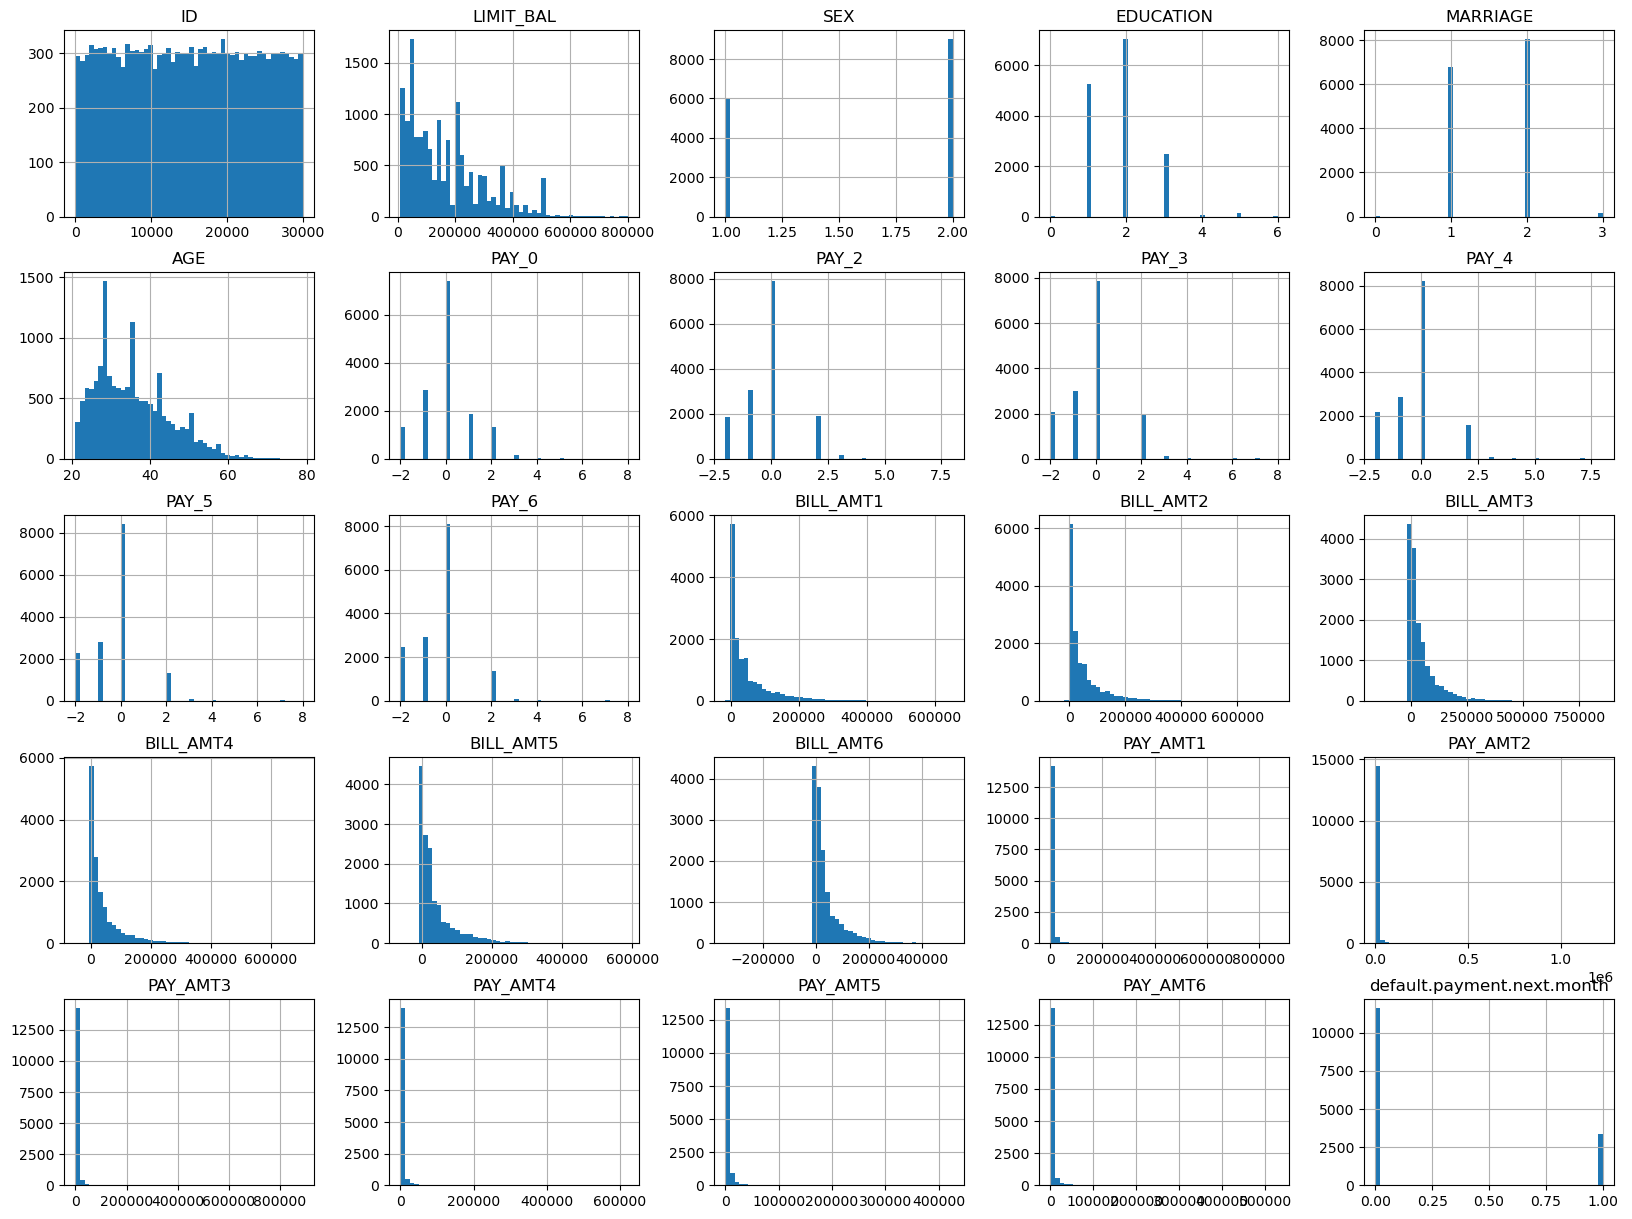

In [14]:
train_df.hist(bins=50, figsize=(20, 15))

**Correlation analyze**

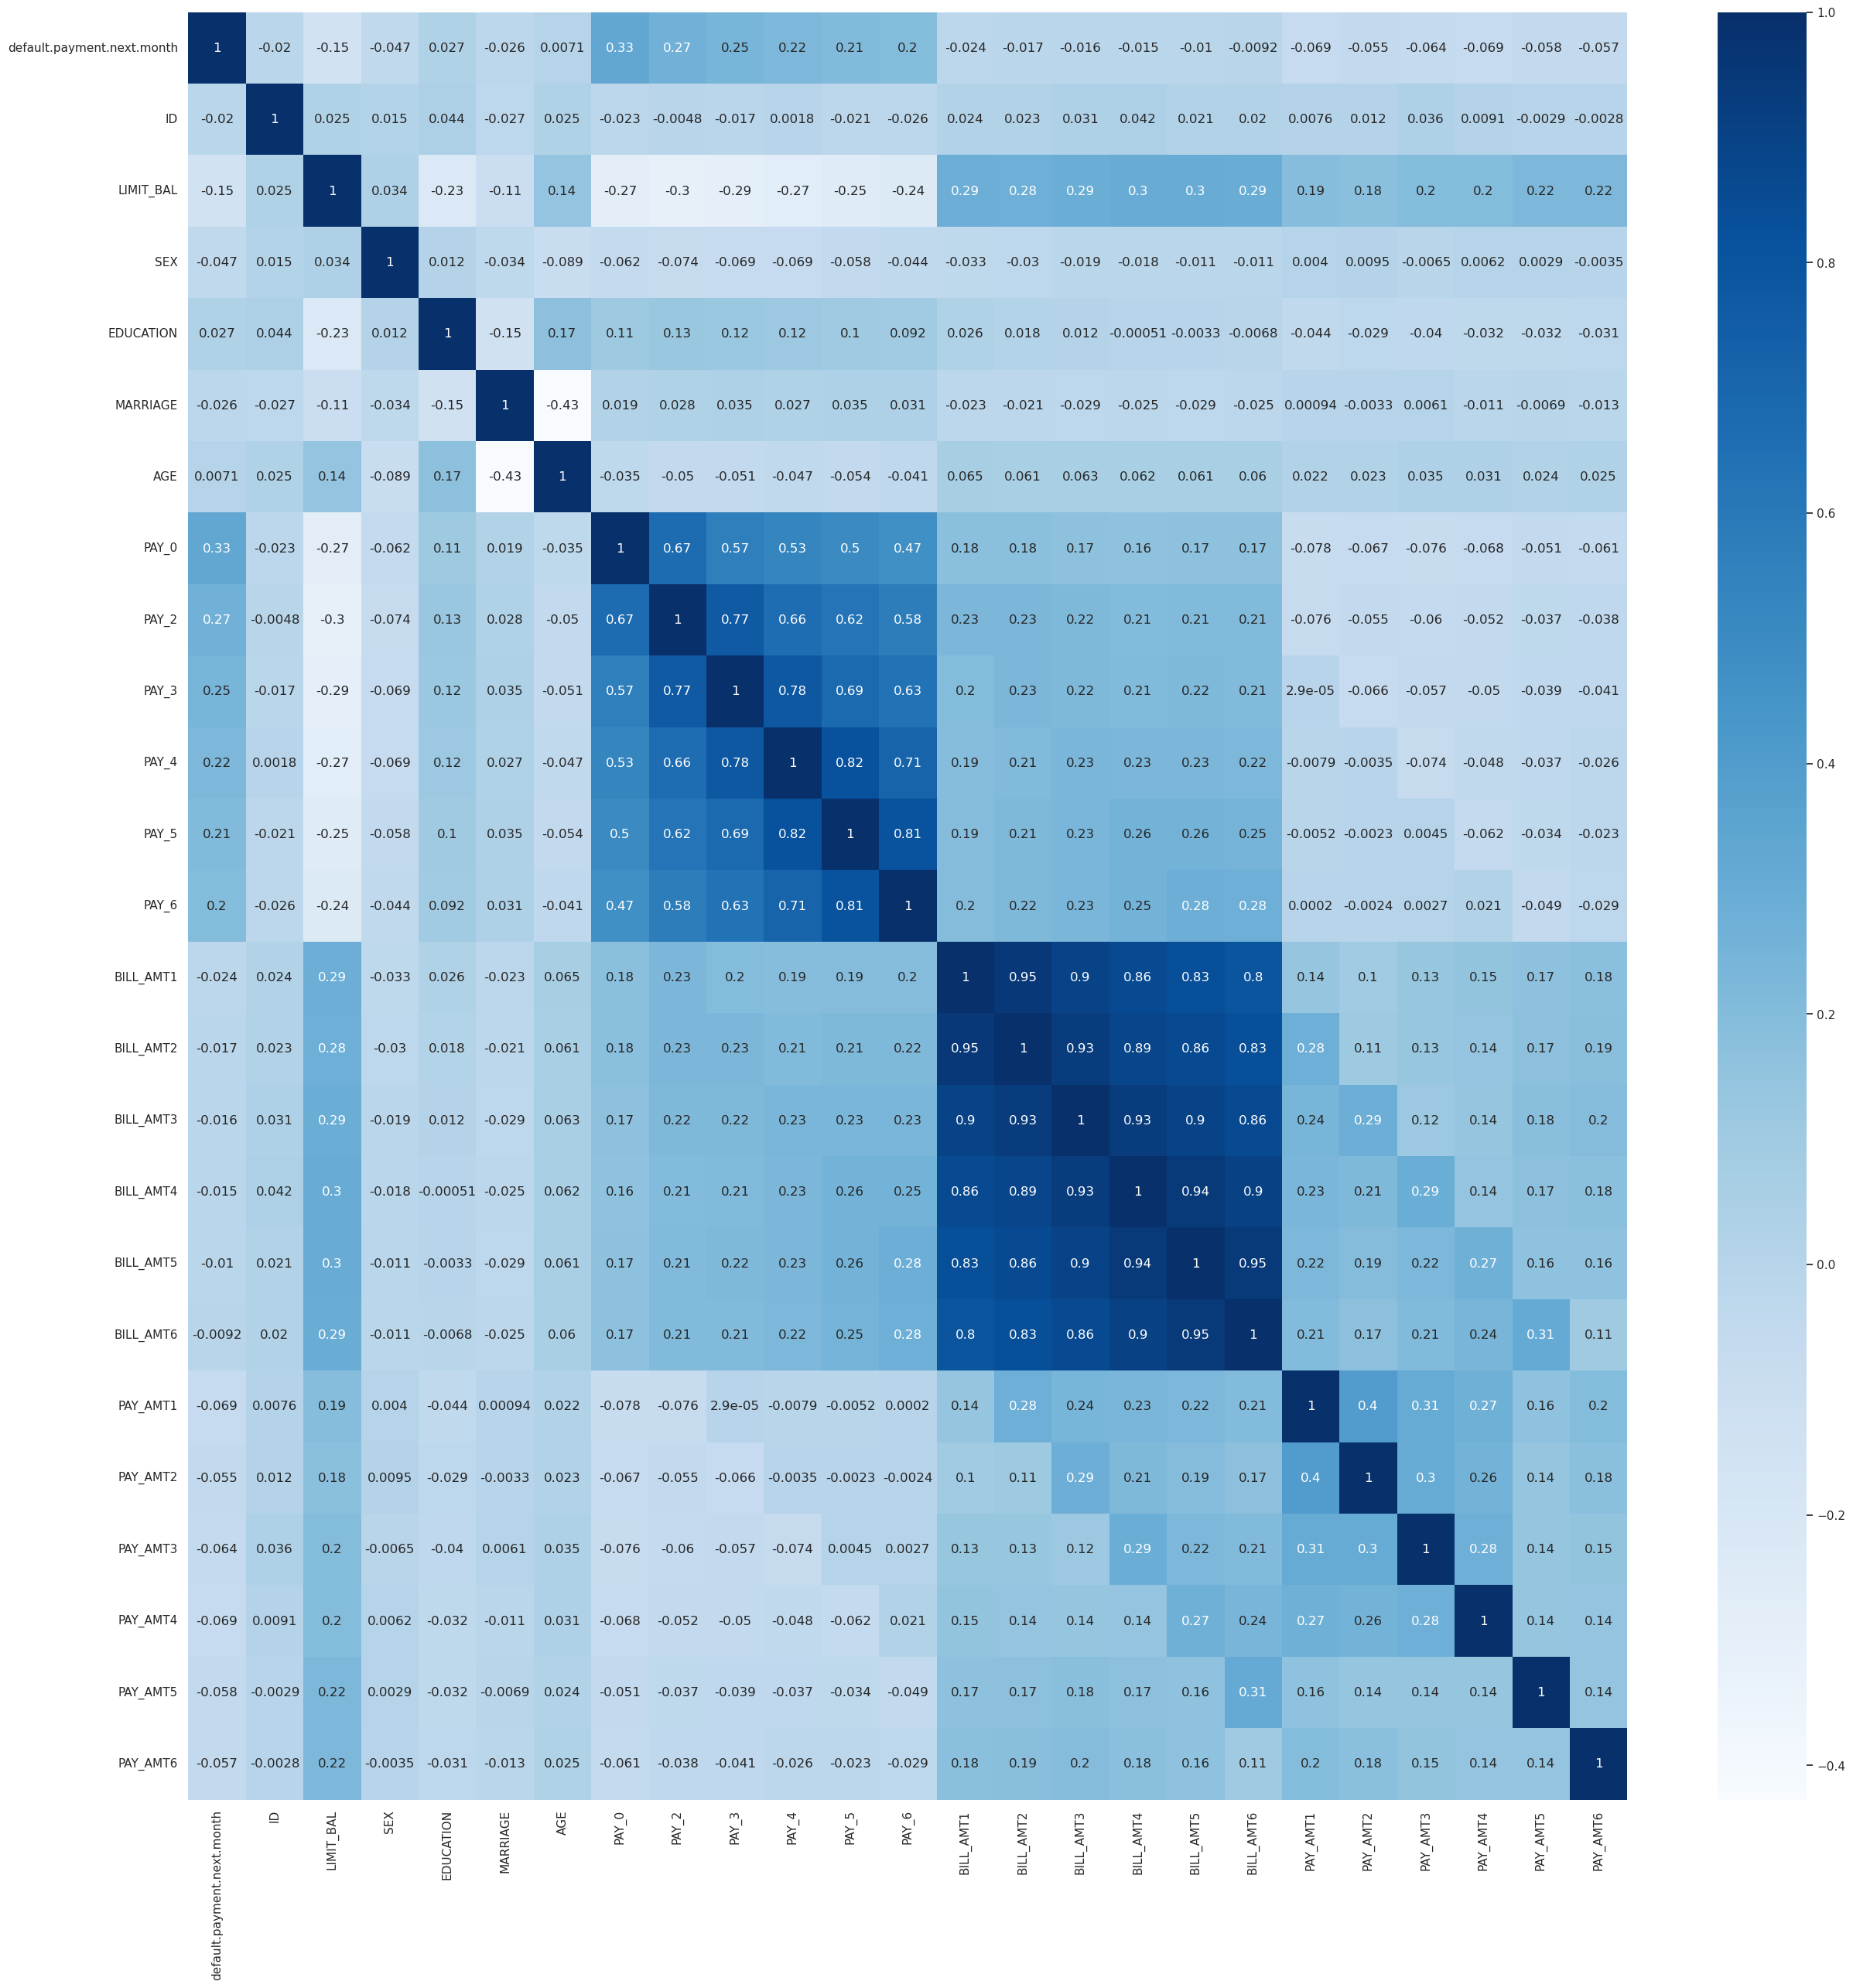

In [15]:
cor = pd.concat((y_train, X_train), axis=1).iloc[:, :30].corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

- The BILL_ATMi (i =1,2,3,4,5,6,) with BILL_ATMj (j=1,2,3,4,5,6 and j not equal to i) are highly corelated
- The PAY_i (i =0,2,3,4,5,6,) with PAY_j (j=0,2,3,4,5,6 and j not equal to i) are highly corelated


**Scatter plot**

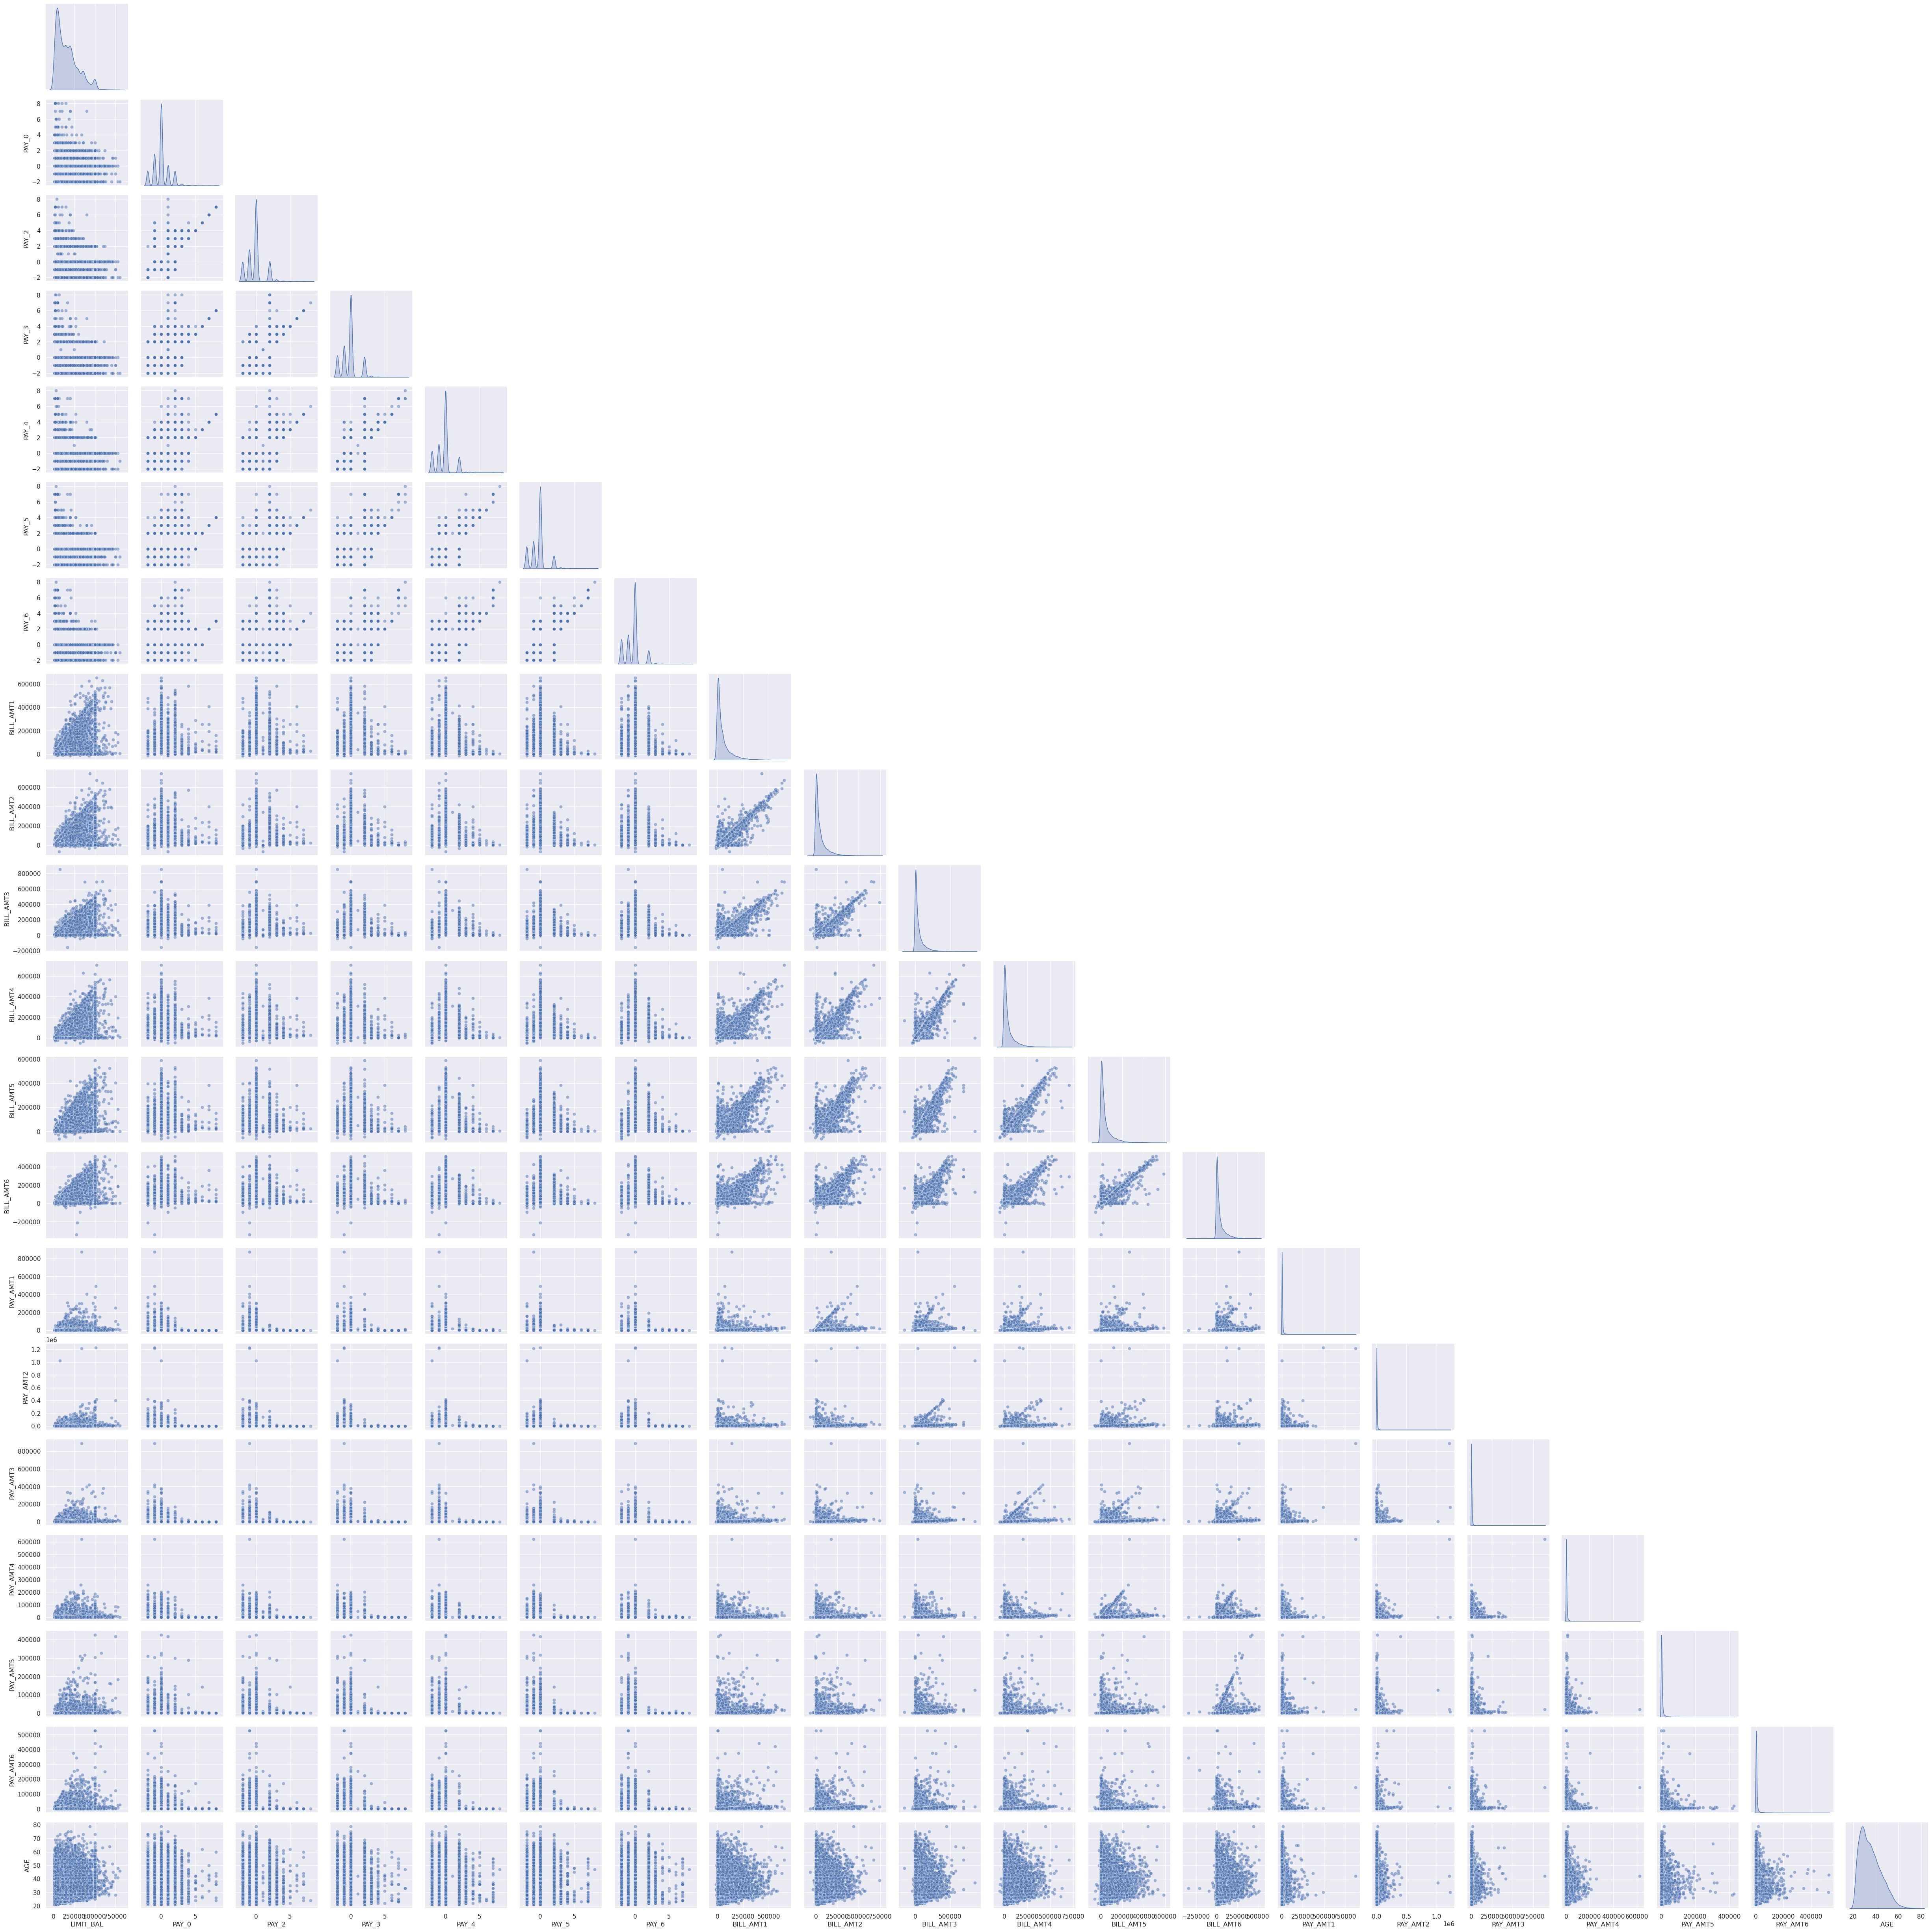

In [16]:
numeric_features = [
    "LIMIT_BAL",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "AGE",
]
sns.pairplot(train_df[numeric_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.5})
plt.show()

By these graphs we couold tell that for variables like BILL_AMT1 and BILL_AMT2, or PAY_AMT1 and PAY_AMT2, are often highly correlated due to their sequential nature. 
And one important observation of these plot would be the relationship between bill amounts and payment amounts, highlighting positive correlation, distribution skewness, and potential outliers.

**Summary of all the Analyze**

1. Our data has a big range which need us to standardize them later
2. Some of  data show imbalance pattern which need us to us metric that give them equal weight -- marco average F1 score
3. We have conlinear relationship between numerical data
4. We have lots of outlier
5. The data contains some wierd value that are not specify in marriage, education and Pay_i (1=1,2,3,4,5,6) that been mentioned above

<!-- END QUESTION -->

<br><br>

## Y 

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [17]:
print("Before SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=123)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("After SMOTE:", y_train.value_counts())

Before SMOTE: default.payment.next.month
0    11638
1     3362
Name: count, dtype: int64
After SMOTE: default.payment.next.month
0    11638
1    11638
Name: count, dtype: int64


Deal wiht the interaction term

In [18]:
X_train['EDUCATION'] = X_train['EDUCATION'].replace({0: 5, 6: 5})

In [19]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
train_df_interactions = poly.fit_transform(train_df[['LIMIT_BAL', 'PAY_0', 'BILL_AMT1']])


<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

Create aggreate varaibels.

In [20]:
pca_pay = PCA(n_components=2)
pay_pca_components = pca_pay.fit_transform(train_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])
train_df['pay_pca_1'] = pay_pca_components[:, 0]
train_df['pay_pca_2'] = pay_pca_components[:, 1]

pca_bill = PCA(n_components=2)
bill_pca_components = pca_bill.fit_transform(train_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']])
train_df['bill_pca_1'] = bill_pca_components[:, 0]
train_df['bill_pca_2'] = bill_pca_components[:, 1]

In [21]:
train_df['Avg_pay_ratio_5'] = train_df['PAY_AMT5'] / train_df['BILL_AMT5']
train_df['Avg_pay_ratio_4'] = train_df['PAY_AMT4'] / train_df['BILL_AMT4']
train_df['Avg_pay_ratio_3'] = train_df['PAY_AMT3'] / train_df['BILL_AMT3']
train_df['Avg_pay_ratio_2'] = train_df['PAY_AMT2'] / train_df['BILL_AMT2']
train_df['Avg_pay_ratio_1'] = train_df['PAY_AMT1'] / train_df['BILL_AMT1']

In [22]:
drop_features = ["ID"] #Since ID is just unique identifier that won't help us with the future prediction
binary_features = ["SEX"]
categorical_features = ['EDUCATION', 'MARRIAGE']
discretization_feats = ['AGE']
target = "default.payment.next.month"
numeric_features_2 = ['LIMIT_BAL',
                      'pay_pca_1','pay_pca_2','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                      'bill_pca_1','bill_pca_2', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                      'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
                    'Avg_pay_ratio_1','Avg_pay_ratio_2','Avg_pay_ratio_3','Avg_pay_ratio_4','Avg_pay_ratio_5']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [23]:
def replace_inf(X):
    return pd.DataFrame(X).replace([np.inf, -np.inf], np.nan)
    
preprocessor = make_column_transformer(
    ('drop', drop_features), 
    (Pipeline([
        ('replace_inf', FunctionTransformer(replace_inf, validate=False)),
        ('imputer', SimpleImputer(strategy='median')), 
        ('scaler', StandardScaler())
    ]), numeric_features_2),
    (OneHotEncoder(drop='if_binary'), binary_features), 
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),  
    (KBinsDiscretizer(n_bins=5, encode='onehot', strategy='uniform'), discretization_feats) 
)

X_train = train_df.drop('default.payment.next.month', axis=1)
y_train = train_df['default.payment.next.month']

def cross_val_auc_scores(model, X_train, y_train, scoring='roc_auc', **kwargs):
    """
    Cross-validate the model with a specified scoring metric (default is ROC AUC).
    
    Parameters:
    model: Estimator object
        The model to be cross-validated.
    X_train: DataFrame or array-like
        The training input samples.
    y_train: DataFrame or array-like
        The target values.
    scoring: str or list, default='roc_auc'
        The scoring metric(s) for cross-validation.
    kwargs: additional keyword arguments
        Additional parameters for cross-validation.
        
    Returns:
    pd.Series: Mean and std deviation of cross-validation scores.
    """
    # Set up cross-validation with scoring
    scores = cross_validate(model, X_train, y_train, scoring=scoring, **kwargs)
    
    # Calculate mean and std deviation
    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    
    # Format the output
    out_col = [f"{mean_scores.iloc[i]:.3f} (+/- {std_scores.iloc[i]:.3f})" for i in range(len(mean_scores))]
    
    return pd.Series(data=out_col, index=mean_scores.index)

results = {}

transformed_data = preprocessor.fit_transform(X_train)
transformed_df = pd.DataFrame(transformed_data)
transformed_df

0         1         2         3         4         5         6   \
0     -0.282085 -0.327711  0.916534  0.011168  0.116066  0.140467 -0.665327   
1      0.566292  0.189144 -0.204767  0.011168  0.116066  0.140467  0.187875   
2     -1.207587  2.329600  2.696157  3.594551  2.634364  1.806082  1.894280   
3      0.334917  0.189144 -0.204767  0.011168  0.116066  0.140467  0.187875   
4      0.103541 -0.821225 -0.313476 -0.884677 -0.723367 -0.692341 -0.665327   
...         ...       ...       ...       ...       ...       ...       ...   
14995  1.646045  0.517906 -1.140147  0.011168  0.116066  0.140467  0.187875   
14996  1.491795 -0.730491 -0.023685  0.907014 -1.562800 -1.525149 -0.665327   
14997 -0.899086  0.189144 -0.204767  0.011168  0.116066  0.140467  0.187875   
14998 -1.053337  0.189144 -0.204767  0.011168  0.116066  0.140467  0.187875   
14999  1.568920 -1.831593 -0.422184 -1.780523 -1.562800 -1.525149 -1.518530   

             7         8         9   ...   35   36   37   38   39   40   41  \
0     -0.647662 -0.613298 -0.109326  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1      0.228346  0.253432  0.769034  ...  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
2      1.980361  0.253432 -0.597406  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
3      0.228346  0.253432  1.925654  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
4     -0.647662 -0.613298 -0.578342  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
14995  0.228346  1.986890 -0.482454  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
14996  0.228346 -0.613298 -0.680849  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
14997  0.228346  0.253432 -0.161955  ...  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
14998  0.228346  0.253432 -0.276605  ...  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
14999 -1.523669 -1.480027 -0.594309  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0   

        42   43   44  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
14995  0.0  0.0  0.0  
14996  1.0  0.0  0.0  
14997  0.0  0.0  0.0  
14998  0.0  0.0  0.0  
14999  0.0  0.0  0.0  

[15000 rows x 45 columns]

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [25]:
results_dict = {}
dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] =cross_val_auc_scores(
    pipe, X_train, y_train, return_train_score=True
)
dummy_results_df = pd.DataFrame(results_dict).T
dummy_results_df

fit_time         score_time         test_score  \
dummy  0.064 (+/- 0.002)  0.017 (+/- 0.000)  0.500 (+/- 0.000)   

             train_score  
dummy  0.500 (+/- 0.000)

In [26]:
cross_val_score(dummy, X_train, y_train)

array([0.776     , 0.776     , 0.776     , 0.77566667, 0.77566667])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [30]:
results_dict = {}
logistic = LogisticRegression(max_iter=1000, random_state = 123)
pipe_lr = make_pipeline(preprocessor, logistic)
results_dict["logistic"] = cross_val_auc_scores(
    pipe_lr, X_train, y_train, return_train_score=True
)
logistic_results_df = pd.DataFrame(results_dict).T
logistic_results_df

fit_time         score_time         test_score  \
logistic  18.235 (+/- 1.421)  0.171 (+/- 0.052)  0.727 (+/- 0.013)   

                train_score  
logistic  0.732 (+/- 0.003)

In [ ]:
param_grid = {
    'logisticregression__C': 10.0 ** np.arange(-2, 2, 0.5)
}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['logisticregression__C']
print(f"Best C: {best_C}")

In [ ]:
#print("Best hyperparameter values: ", random_search.best_params_)
#print("Best score: %0.3f" % (random_search.best_score_))

#pd.DataFrame(random_search.cv_results_)[
#    [
#        "mean_train_score",
#        "mean_test_score",
#        "param_logisticregression__C",
#        "mean_fit_time",
#        "rank_test_score",
#        "std_test_score",
#    ]
#].set_index("rank_test_score").sort_index()[:10]

In [ ]:
logistic = LogisticRegression(max_iter=1000, C = best_C, random_state = 123)
pipe = make_pipeline(preprocessor, logistic)
results_dict["best_logistic"] = ross_val_auc_scores(
    pipe, X_train, y_train, return_train_score=True,scoring =score_metric
)
best_logistic_results_df = pd.DataFrame(results_dict).T
best_logistic_results_df

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
results_dict = {}
models = {
    "RBF SVM": SVC(),
    "random forest": RandomForestClassifier(class_weight="balanced", random_state=2),
    "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=2),
    "lgbm": LGBMClassifier(scale_pos_weight=ratio, random_state=2),
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True, scoring=score_metric
    )

pd.DataFrame(results).T

In [ ]:
differnet_model_results_df

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
logistic = LogisticRegression(max_iter=1000, random_state=123)
rfecv = RFECV(estimator=logistic, step=1, scoring='roc_auc')

pipe_selection_logistic = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', rfecv)
])

results_dict = {}
results_dict["feature_selection_logistic"] = mean_std_cross_val_scores(
    pipe_selection_logistic, X_train, y_train, return_train_score=True
)

selection_results_df = pd.DataFrame(results_dict).T
selection_results_df

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)